In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import pandas and mathplot and read file 
myData = pd.read_csv("C:\\Users\\msDesktop2\\Documents\\USAtobaccoUsage.csv", usecols=[0, 1, 2, 3, 4, 5]) 

In [23]:
#Cleaning the data: renaming, and adding stripping %s 
myData = myData.rename(columns={'Year':'year',
                                            'State':'state',
                                            'Smoke everyday':'dailySmoker', 
                                            'Smoke some days':'nonDailySmoker', 
                                            'Former smoker':'formerSmoker', 
                                            'Never smoked':'nonSmoker'})
for col in myData.columns[2:]:
    myData[col] = myData[col].str.rstrip('%')
    myData[col] = pd.to_numeric(myData[col])
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            876 non-null    int64  
 1   state           876 non-null    object 
 2   dailySmoker     876 non-null    float64
 3   nonDailySmoker  876 non-null    float64
 4   formerSmoker    876 non-null    float64
 5   nonSmoker       876 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 41.2+ KB


No handles with labels found to put in legend.


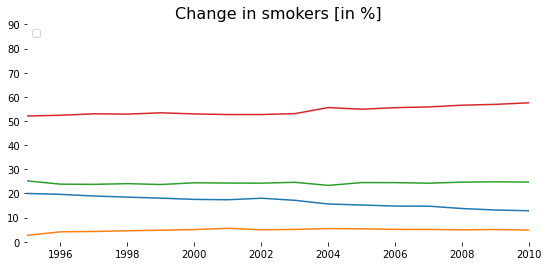

In [25]:
#doing a subplot, adding a legend to upper left and changing tilte to change in smokers in % 
plt.figure(figsize=(9, 4))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.ylim(0, 90)    
plt.xlim(1995, 2010)

plt.title("Change in smokers [in %]", fontsize=16)
plt.plot(myData.sort_values(['year']).groupby(['year']).mean()['dailySmoker'])
plt.plot(myData.sort_values(['year']).groupby(['year']).mean()['nonDailySmoker'])
plt.plot(myData.sort_values(['year']).groupby(['year']).mean()['formerSmoker'])
plt.plot(myData.sort_values(['year']).groupby(['year']).mean()['nonSmoker'])
legend = ax.legend(loc='upper left')